In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('finald - finald.csv')
df.head()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BLR-DEL,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara
0,7.5,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.5,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7.5,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7.5,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,7.5,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,7.4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2]:
#plt.scatter(df['A_Delay'],df['Duration'])
#plt.show()
df.columns



Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'D_Delay',
       'Duration', 'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'BLR-BOM', 'BLR-DEL',
       'BOM-DEL', 'CCU-DEL', 'DEL-HYD', 'Air Asia', 'Air India', 'Go Air',
       'Indigo', 'Spicejet', 'Vistara'],
      dtype='object')

"plt.scatter(df['D_Airport On Time Rating'],df['A_Delay'])\nplt.scatter(df['D_Airport Service Rating'],df['A_Delay'])\nplt.scatter(df['A_Airport Rating'],df['A_Delay'])\nplt.scatter(df['A_Airport On Time Rating'],df['A_Delay'])\nplt.scatter(df['A_Airport Service Rating'],df['A_Delay'])\nplt.scatter(df['C_Rating'],df['A_Delay'])\nplt.scatter(df['C_On Time Performance Rating'],df['A_Delay'])"

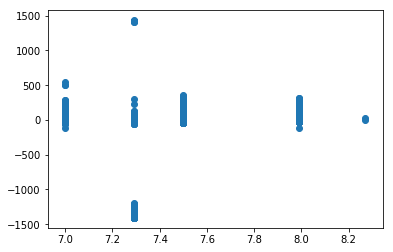

In [3]:
plt.scatter(df['D_Airport Rating'],df['A_Delay'])
'''plt.scatter(df['D_Airport On Time Rating'],df['A_Delay'])
plt.scatter(df['D_Airport Service Rating'],df['A_Delay'])
plt.scatter(df['A_Airport Rating'],df['A_Delay'])
plt.scatter(df['A_Airport On Time Rating'],df['A_Delay'])
plt.scatter(df['A_Airport Service Rating'],df['A_Delay'])
plt.scatter(df['C_Rating'],df['A_Delay'])
plt.scatter(df['C_On Time Performance Rating'],df['A_Delay'])'''
#All of these showing scatterplot similar to below more or less

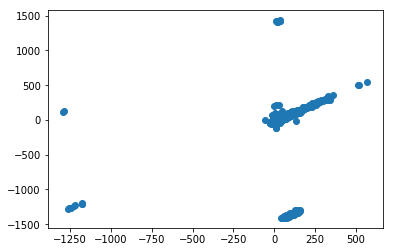

In [3]:
plt.scatter(df['D_Delay'],df['A_Delay'])
plt.show()
df.drop('D_Delay',axis=1,inplace=True)
#Showing nearly linear relation so can be a source of data leakage.Hence must be dropped

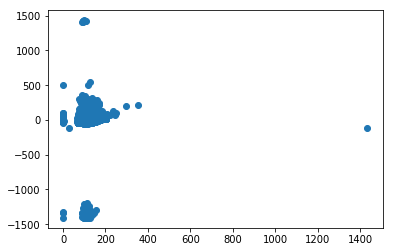

In [5]:
plt.scatter(df['Duration'],df['A_Delay'])
plt.show()

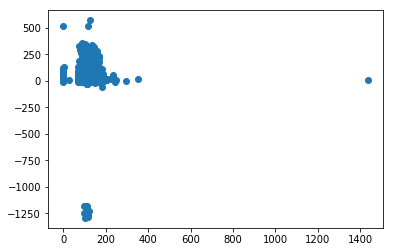

In [263]:
#We can see A_Delay lies mostly between -500 and 500
#Duration mostly less than 300,Thus we need to remove outlier
#Also we see how arrival conditions affect A_Delay by seeing plotting scatter plots
#If we see plots excluding the outliers then most of them follow normal distribution except pressure.precipMM,A_Time.
plt.scatter(df['Duration'],df['D_Delay'])





In [4]:
df.drop(df[df['Duration'] > 300].index, inplace = True)
df.drop(df[df['A_Delay'] > 500].index, inplace = True)
df.drop(df[df['A_Delay'] < -500].index, inplace = True)




In [5]:
#df['Spicejet'].value_counts()-1729
#df['Air Asia'].value_counts()-1882
#df['Air India'].value_counts()-3542
#df['Vistara'].value_counts()-2834
#df['Indigo'].value_counts()-2298
#df['Go Air'].value_counts()-2498
print(abs(df[df['Spicejet']==1]['A_Delay']).sum()/1729)
print(abs(df[df['Air Asia']==1]['A_Delay']).sum()/1882)
print(abs(df[df['Air India']==1]['A_Delay']).sum()/3542)
print(abs(df[df['Vistara']==1]['A_Delay']).sum()/2834)
print(abs(df[df['Indigo']==1]['A_Delay']).sum()/2298)
print(abs(df[df['Go Air']==1]['A_Delay']).sum()/2498)

17.368999421631
13.839027630180658
15.484754376058724
13.159139026111504
20.888598781549174
12.156925540432345


(array([1.000e+00, 1.483e+03, 1.230e+04, 7.730e+02, 1.260e+02, 4.100e+01,
        2.200e+01, 1.900e+01, 1.200e+01, 6.000e+00]),
 array([-118. ,  -70.7,  -23.4,   23.9,   71.2,  118.5,  165.8,  213.1,
         260.4,  307.7,  355. ]),
 <a list of 10 Patch objects>)

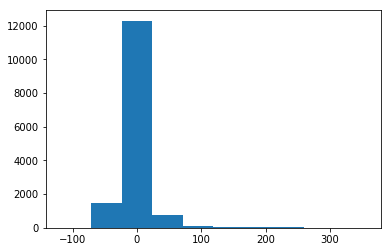

In [6]:
plt.hist(df['A_Delay'])
#Right Skewed

In [7]:
y=df['A_Delay']
df.drop('A_Delay',axis=1,inplace=True)


In [8]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pt=PowerTransformer(method='yeo-johnson')
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=10)
pt.fit(y_train.to_numpy().reshape(-1,1))
y_train=pt.transform(y_train.to_numpy().reshape(-1,1))
y_test=pt.transform(y_test.to_numpy().reshape(-1,1))

poly = PolynomialFeatures(degree = 2, include_bias = True, interaction_only = True)
df_poly = poly.fit_transform(df)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(df_poly,y, test_size=0.30, random_state=10)





In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf=RandomForestRegressor()
rf.fit(Xp_train,y_train)
print(mean_squared_error(rf.predict(Xp_train),y_train))
print(mean_squared_error(rf.predict(Xp_test),y_test))



/home/riju/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/riju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.05285353249072635
0.2629053418782688


In [10]:
#Now selecting best features ie 60 best using SelectKBest
from sklearn.feature_selection import SelectKBest,mutual_info_regression
skb=SelectKBest(mutual_info_regression,k=60)
skb.fit(Xp_train,y_train)
Xp60_train = skb.transform(Xp_train)
Xp60_test = skb.transform(Xp_test)
rf=RandomForestRegressor(min_samples_split=17,n_estimators=100,n_jobs=-1,random_state=10)
rf.fit(Xp60_train,y_train)
print(mean_squared_error(rf.predict(Xp60_train),y_train))
print(mean_squared_error(rf.predict(Xp60_test),y_test))




/home/riju/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/riju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.12151508649028439
0.2462802939855282


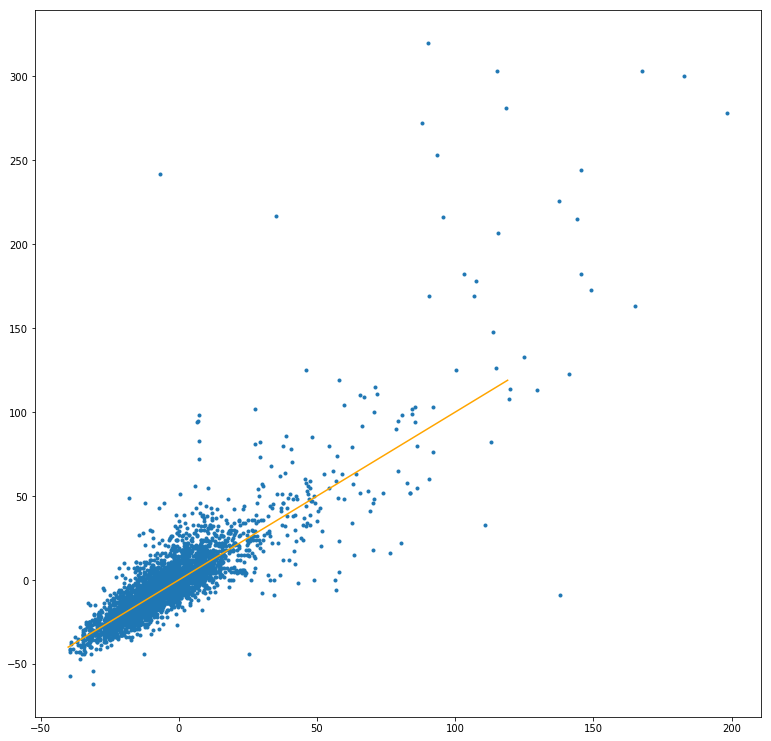

In [11]:
f1=pt.inverse_transform(rf.predict(Xp60_test).reshape(-1,1))
f2=pt.inverse_transform(y_test.reshape(-1,1))
plt.figure(figsize=(13,13))
plt.plot(np.arange(-40,120),np.arange(-40,120),'orange')
plt.scatter(f1,f2,marker='.')

In [12]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))